# Price vs Return

**Price** $P_t$ is just the market value of an asset at time $t$.

**Return** $R_t$ tells you how much your investment changed between $t-1$ and $t$, which is more directly related to your profit or loss.

## Simple vs Log Returns

### Simple return:

$$r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

Tells percent change for one period.

### Log return:

$$\ell_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

Adds nicely over time and is symmetric for price moves.

**Note:** For small price changes, simple return ≈ log return.

## Random Variable Perspective

The returns are uncertain: they represent a **random variable** describing future price moves.

We study the **distribution of returns**, not prices, to model risk & reward.

## Exercise 1
Plot Price vs Log Return for AAPL.


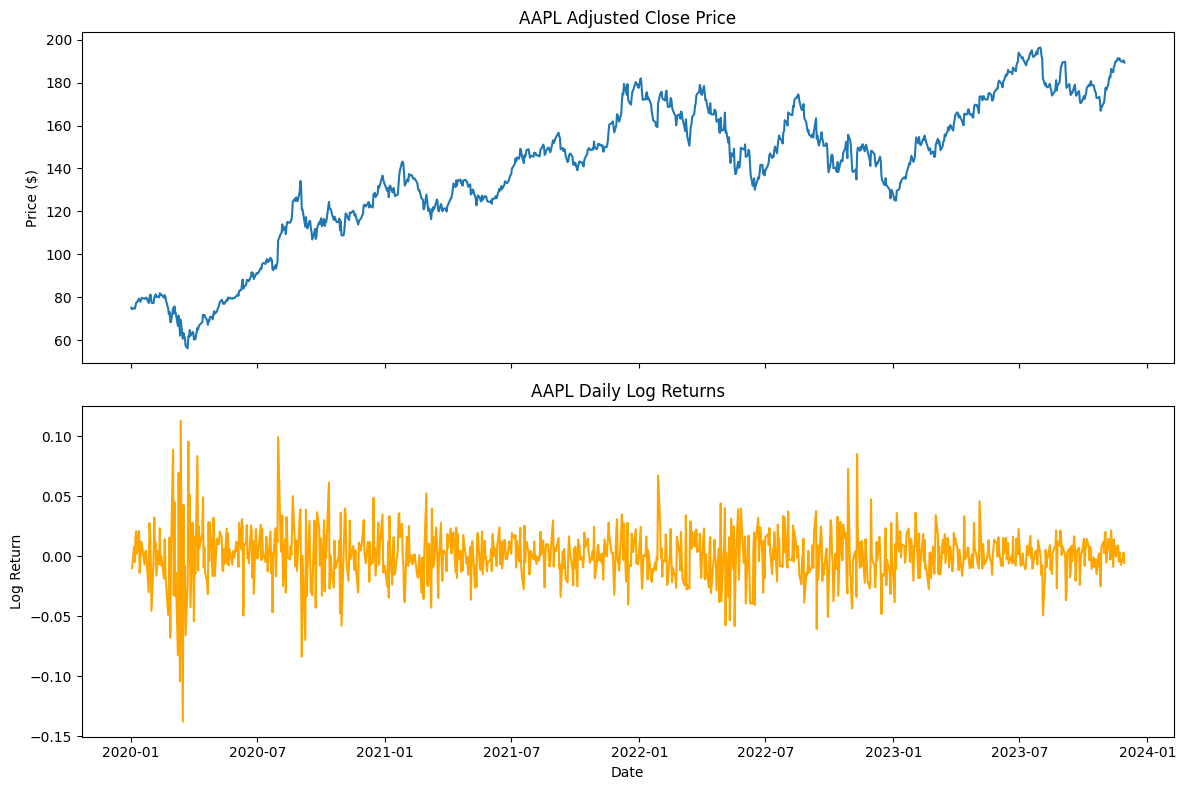

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical prices
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-11-30", progress=False, auto_adjust=False)
prices = data['Close']

# Step 2: Calculate returns
simple_returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

# Step 3: Plot price and log returns
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(prices.index, prices.values)
axs[0].set_title(f"{ticker} Adjusted Close Price")
axs[0].set_ylabel("Price ($)")

axs[1].plot(log_returns.index, log_returns.values, color="orange")
axs[1].set_title(f"{ticker} Daily Log Returns")
axs[1].set_ylabel("Log Return")
axs[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

### Questions
1. _How do the price and return plots differ visually?_

Yes, the price plot shows the actual price of the stock, while the return plot shows the percentage change in price from one day to the next.

2. _Do returns look “noisier” than prices? Why might this help with modeling?_

Yes, returns are noisier that prices. This helps with modeling because it allows us to study the distribution of returns to model risk and reward.

3. _Can you explain to a friend why we focus on returns, not prices?_

The goal is to study the distribution of returns to model risk and reward. Prices are not random variables, they are just functions of time and space.


# Mean & Variance

## Mean (Expected Value)

The **mean return** $\bar{r}$ is the average gain/loss you observe in your data.

$$\bar{r} = \frac{1}{n}\sum r_t$$

**Interpretation:** "If I repeat this investment many times with the same data characteristics, this is my average daily performance."

## Variance & Standard Deviation (Volatility)

**Variance** measures spread around the mean:

$$s^2 = \frac{1}{n-1}\sum (r_t - \bar{r})^2$$

**Standard deviation** $s = \sqrt{s^2}$ (same units as returns)

In finance: **standard deviation = volatility = measure of risk/uncertainty.**

## Annualization

Daily volatility → Annual:

$$\sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252}$$

**Why $\sqrt{252}$?** Variance adds linearly over independent periods, std. dev. $s$ takes square root.

20% annual volatility ≈ 1.26% daily volatility.

**Key insight:** Mean tells expected performance. Volatility tells how bumpy the ride will be.

## Exercise 2
Plot mean, std, and annualized volatility for AAPL.

AAPL Analysis:
Mean daily log return:     0.000940 (0.0940%)
Daily volatility:          0.021315 (2.1315%)
Annualized volatility:     0.3384 (33.84%)
Annualized mean return:    0.2369 (23.69%)


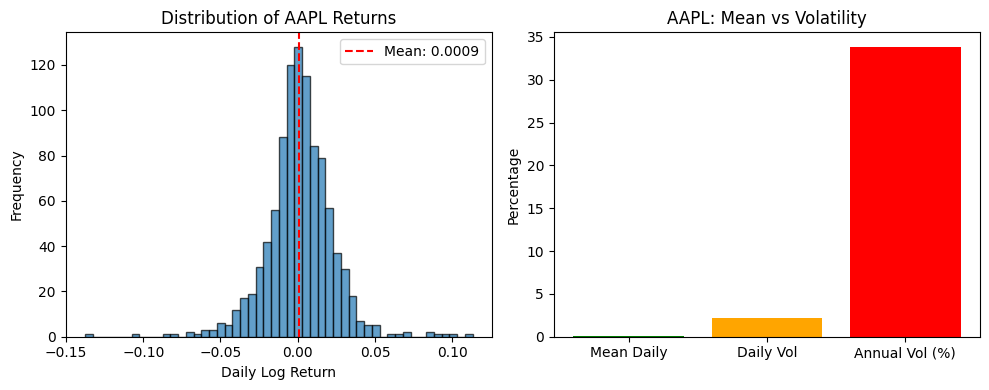

In [2]:
# Step 1: Basic statistics
mean_daily = log_returns.values.mean()
std_daily = log_returns.values.std()
annualized_vol = std_daily * np.sqrt(252)

# Annualized mean (rough approximation)
annualized_mean = mean_daily * 252

print(f"AAPL Analysis:")
print(f"Mean daily log return:     {mean_daily:.6f} ({mean_daily*100:.4f}%)")
print(f"Daily volatility:          {std_daily:.6f} ({std_daily*100:.4f}%)")
print(f"Annualized volatility:     {annualized_vol:.4f} ({annualized_vol*100:.2f}%)")
print(f"Annualized mean return:    {annualized_mean:.4f} ({annualized_mean*100:.2f}%)")

# Step 2: Histogram of returns
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(mean_daily, color='red', linestyle='--', label=f'Mean: {mean_daily:.4f}')
plt.xlabel('Daily Log Return')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Returns')
plt.legend()

# Step 3: Mean vs Volatility comparison
plt.subplot(1, 2, 2)
plt.bar(['Mean Daily', 'Daily Vol', 'Annual Vol (%)'], 
        [mean_daily*100, std_daily*100, annualized_vol*100], 
        color=['green', 'orange', 'red'])
plt.title('AAPL: Mean vs Volatility')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

### Questions
1. _Compare magnitudes: Is daily volatility much larger than mean daily return? Why does this matter?_

Yes, daily volatility is much larger than mean daily return. This matters because on a daily basis the risk is larger than the expected return.

2. _Annual scaling: Does 20-30% annual volatility sound reasonable for AAPL?_

Yes, 20-30% annual volatility is reasonable for AAPL. AAPL is a technology company, so it has a high volatility.

3. _Histogram insight: Does the return distribution look symmetric? Are there more big losses or gains?_

The return distribution is not symmetric. There are more big losses than gains. This means that returns are not normally distributed, but rather they are log-normal distributed.


# Comparing Multiple Assets

## Asset Universe

A portfolio is built from several assets, each with its own distribution of returns.

The first step in risk thinking is comparing their individual means and volatilities.

## Sample Estimates per Asset

Given daily log returns $r_t^{(i)}$ for asset $i$, you estimate:

- $\bar{r}^{(i)}$: average daily return.
- $\sigma^{(i)}$: standard deviation (daily volatility).

You can annualize each as before.

## Interpretation

A table of [mean, volatility] per asset gives a quick map of relative risk and reward.

You will later combine them into portfolios.

## Exercise 3
Comparison between AAPL, MSFT, SPY and TLT.

In [3]:
import pandas as pd

tickers = ["AAPL", "MSFT", "SPY", "TLT"] # Our assets to be compared
start_date = "2020-01-01"
end_date = "2023-11-30"

# Download prices
prices_df = pd.DataFrame()
for t in tickers:
    data_t = yf.download(t, start=start_date, end=end_date, progress=False, auto_adjust=False)
    prices_df[t] = data_t["Close"]

# Compute log returns
log_ret_df = np.log(prices_df / prices_df.shift(1)).dropna()

# Summary stats
summary = pd.DataFrame(index=tickers, columns=["mean_daily", "vol_daily", "vol_annual", "mean_annual", "ratio_annual"])

for t in tickers:
    r = log_ret_df[t]
    mean_daily = r.mean()
    vol_daily = r.std()
    summary.loc[t, "mean_daily"] = mean_daily
    summary.loc[t, "vol_daily"] = vol_daily
    summary.loc[t, "mean_annual"] = mean_daily * 252
    summary.loc[t, "vol_annual"] = vol_daily * np.sqrt(252)
    summary.loc[t, "ratio_annual"] = summary.loc[t, "mean_annual"] / summary.loc[t, "vol_annual"]


print(summary)

     mean_daily vol_daily vol_annual mean_annual ratio_annual
AAPL    0.00094  0.021325   0.338531    0.236903     0.699796
MSFT   0.000872  0.020742   0.329277    0.219757     0.667394
SPY    0.000341  0.014493   0.230076    0.086053     0.374018
TLT   -0.000398  0.011821    0.18766   -0.100247    -0.534196


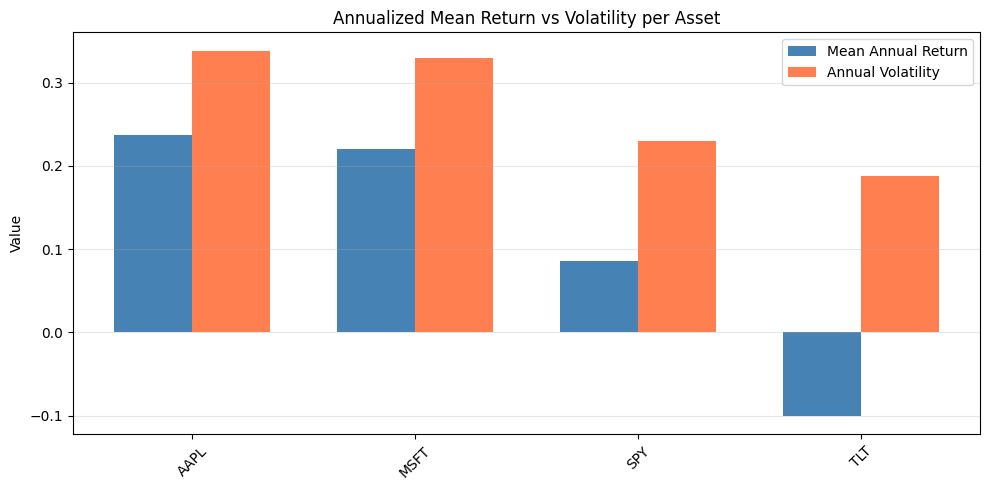

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(summary.index))
width = 0.35

bars1 = ax.bar(x - width/2, summary["mean_annual"].astype(float), width, 
               label='Mean Annual Return', color='steelblue')
bars2 = ax.bar(x + width/2, summary["vol_annual"].astype(float), width,
               label='Annual Volatility', color='coral')

ax.set_ylabel('Value')
ax.set_title('Annualized Mean Return vs Volatility per Asset')
ax.set_xticks(x)
ax.set_xticklabels(summary.index, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/49/0hqy2frn1bz76drd1fs2g9xh0000gn/T/ipykernel_5733/3749399240.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


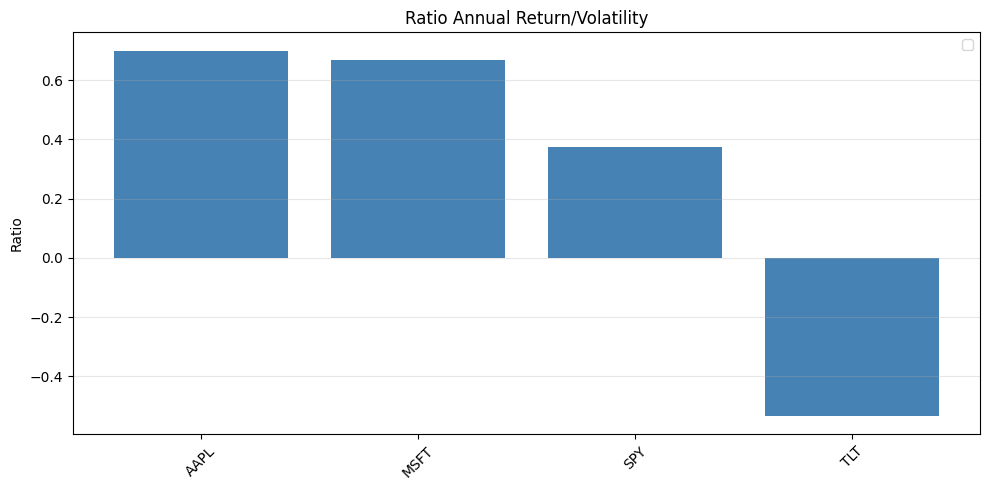

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(summary.index))

bars = ax.bar(x, summary["ratio_annual"].astype(float), color='steelblue')

ax.set_ylabel('Ratio')
ax.set_title('Ratio Annual Return/Volatility')
ax.set_xticks(x)
ax.set_xticklabels(summary.index, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Questions
1. _Which asset is riskiest by volatility?_

AAPL is the riskiest in terms of annual volatility.

2. _Which has highest annual mean?_

AAPL has the highest annual mean.

3. _If you were forced to pick one single asset, which looks most attractive and why?_

AAPL looks most attractive because it has the best ratio of annual mean to annual volatility. It is closely followed by MSFT. Worst by far ius TLT, that has a negative annual mean yet a low annual volatility.


# Risk-Return Scatter

## Risk–Return Space

Each asset can be seen as a point in a 2D plot:

*   **x-axis:** Risk (Volatility)
*   **y-axis:** Expected Return

The goal is to find assets with **high return** for **low risk**, though you typically face a trade-off between the two.

## Dominance

Asset A **dominates** Asset B if A has **higher return** AND **lower risk**.

In practice, strict dominance is rare, but the concept helps you evaluate asset quality visually relative to peers.

## Limitations

This simple analysis is only **first-order** (focusing on Mean & Variance).

Factors like **Correlation** and **Tail Behavior** (extreme events) matter significantly in risk management, and we will explore them next.

## Exercise 4
Plot scatterplot of AAPL, MSFT, SPY and TLT.

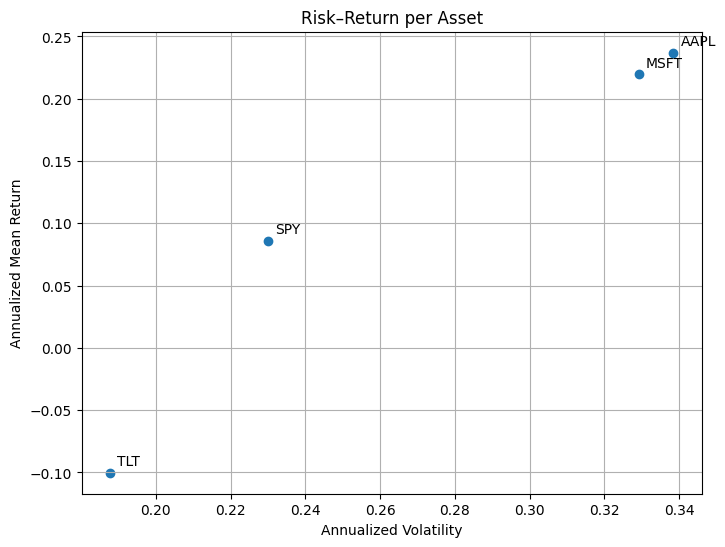

In [6]:
vol = summary["vol_annual"].astype(float)
ret = summary["mean_annual"].astype(float)

plt.figure(figsize=(8, 6))
plt.scatter(vol, ret)

for t in summary.index:
    plt.annotate(t, (vol[t], ret[t]), textcoords="offset points", xytext=(5,5))

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Mean Return")
plt.title("Risk–Return per Asset")
plt.grid(True)
plt.show()

### Questions

1. _Which assets are “better” in risk–return space?_

Those whose volatility is lower and whose mean is higher. In our scenario, despite its higher annual return, AAPL has the highest volatility.

2. _Do you see any that look obviously poor (higher risk, lower return than another)?_

TLT looks obviously poor. Negative return despite being the least volatile.

3. _How might combining them help?_

It depends on the correlation. If they are negatively correlated, then combining them can reduce the overall volatility.

# Two-Asset Portfolio & Diversification

## Two-Asset Portfolio Return

If you invest weight $w$ in asset A and $1-w$ in asset B, the portfolio return is:

$$r_p = w r_A + (1-w) r_B$$

## Portfolio Variance

Let $\sigma_A, \sigma_B$ be volatilities, and $\rho_{AB}$ their correlation. Then:

$$\sigma_p^2 = w^2 \sigma_A^2 + (1-w)^2 \sigma_B^2 + 2w(1-w)\sigma_A \sigma_B \rho_{AB}$$

If $\rho_{AB} < 1$, there exists a weight where portfolio volatility is lower than both $\sigma_A$ and $\sigma_B$. This is **diversification**.

## Key Intuition

The risk of a portfolio is **not** just a weighted average of individual risks; **correlation can reduce risk**.

# Exercise 5
Diversification of 2 assets: APPL and TLT.

In [7]:
assetA = "AAPL"
assetB = "TLT"

rA = log_ret_df[assetA]
rB = log_ret_df[assetB]

sigmaA = rA.std()
sigmaB = rB.std()
rho = rA.corr(rB)

print("Daily vol A:", sigmaA)
print("Daily vol B:", sigmaB)
print("Correlation:", rho)

Daily vol A: 0.021325447086990305
Daily vol B: 0.011821450357958785
Correlation: -0.11974912661884114


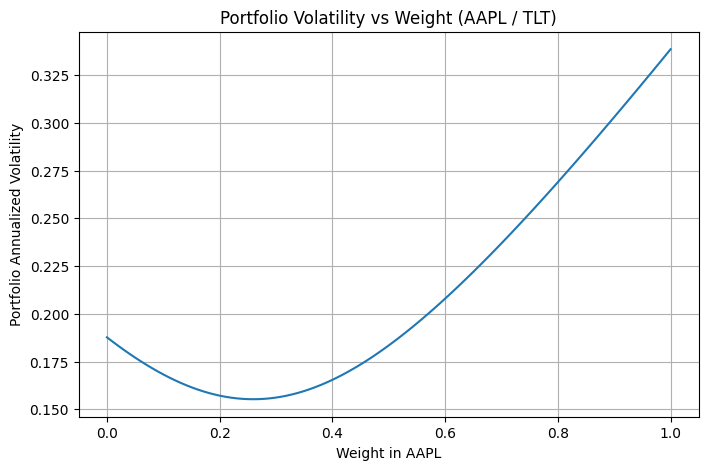

In [8]:
weights = np.linspace(0, 1, 101)
port_vol = []
port_mean = []

for w in weights:
    rp = w * rA + (1 - w) * rB
    port_vol.append(rp.std() * np.sqrt(252))      # annual vol
    port_mean.append(rp.mean() * 252) 

plt.figure(figsize=(8, 5))
plt.plot(weights, port_vol)
plt.xlabel(f"Weight in {assetA}")
plt.ylabel("Portfolio Annualized Volatility")
plt.title(f"Portfolio Volatility vs Weight ({assetA} / {assetB})")
plt.grid(True)
plt.show()     # annual mean

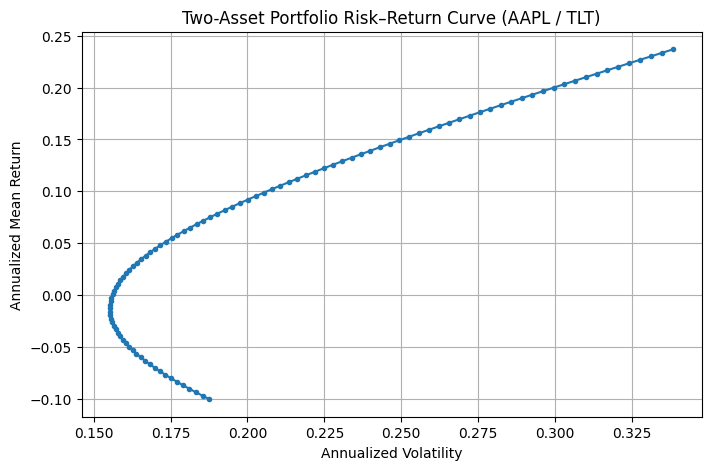

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(port_vol, port_mean, marker='.')
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Mean Return")
plt.title(f"Two-Asset Portfolio Risk–Return Curve ({assetA} / {assetB})")
plt.grid(True)
plt.show()

In [10]:
min_vol = min(port_vol)
w_min_vol = weights[port_vol.index(min_vol)]

print(f"Min portfolio vol: {min_vol:.4f} at weight {w_min_vol:.2f} in {assetA}")
print(f"Vol {assetA}: {sigmaA*np.sqrt(252):.4f}")
print(f"Vol {assetB}: {sigmaB*np.sqrt(252):.4f}")

Min portfolio vol: 0.1553 at weight 0.26 in AAPL
Vol AAPL: 0.3385
Vol TLT: 0.1877


### Questions
1. _At which weight is volatility minimal? Is it lower than both individual volatilities?_

At weight 0.26 for AAPL, the volatility is minimal. It is lower than both individual volatilities. However, the mean return is negative.

2. _What is the economic intuition: why can two risky assets create a less risky blend?_

The economic intuition is that the two assets move in opposite directions, so the volatility is reduced.

3. _How might this idea scale to many assets?_

The idea can scale to many assets by using the same concept of diversification. More assets means more opportunities for diversification, so the volatility is reduced. However, the correlation between assets is also important. If the assets are highly correlated, then the diversification benefit is reduced.
